# Set carbon emission targets

In this notebook a target for the emission is set and the required tax rate is calculated. This involves inverting the model, and takes some time.  

In [1]:
# Import modelflow

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modelmf
import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

model.scroll_off()

In [3]:
# Load model and data, and run 

masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1)
from inject import inject
inject(masia)  
masia.lastdf = masia.basedf.copy()

# Parameters in this experiment


In [4]:
countries_of_interest = [country for country in masia.countries_ASEAN]
                         
instruments = [[f'{country}_GCARBR_A'] for country in countries_of_interest]
target_var  = [f'{country}_CO2' for country in countries_of_interest]
delay = 2
reduction_percent = 30 

# The instrument variables

In [5]:
print(instruments)

[['BRN_GCARBR_A'], ['KHM_GCARBR_A'], ['IDN_GCARBR_A'], ['LAO_GCARBR_A'], ['MYS_GCARBR_A'], ['MMR_GCARBR_A'], ['PHL_GCARBR_A'], ['SGP_GCARBR_A'], ['THA_GCARBR_A'], ['VNM_GCARBR_A']]


# The target variables

In [6]:
print(target_var)

['BRN_CO2', 'KHM_CO2', 'IDN_CO2', 'LAO_CO2', 'MYS_CO2', 'MMR_CO2', 'PHL_CO2', 'SGP_CO2', 'THA_CO2', 'VNM_CO2']


# Emission in Business as usual scenario

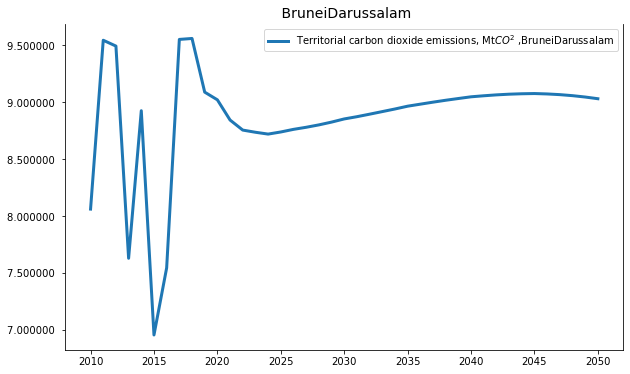

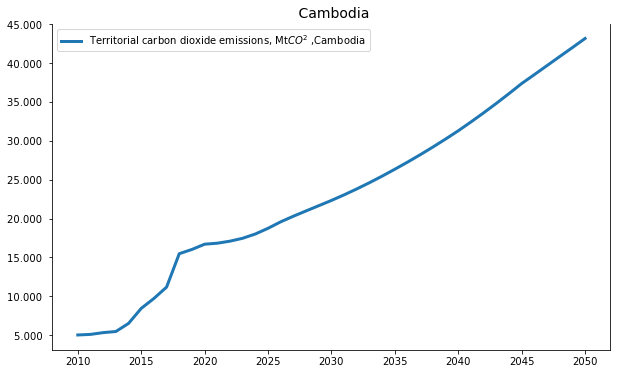

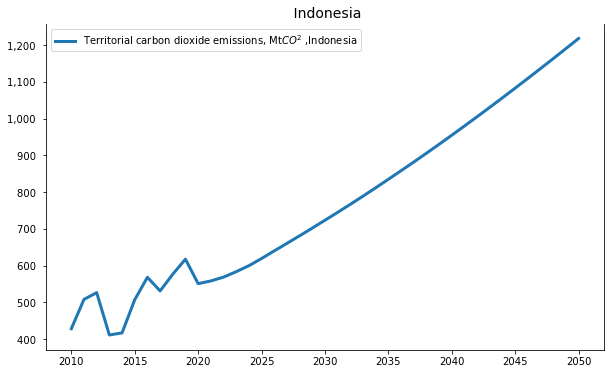

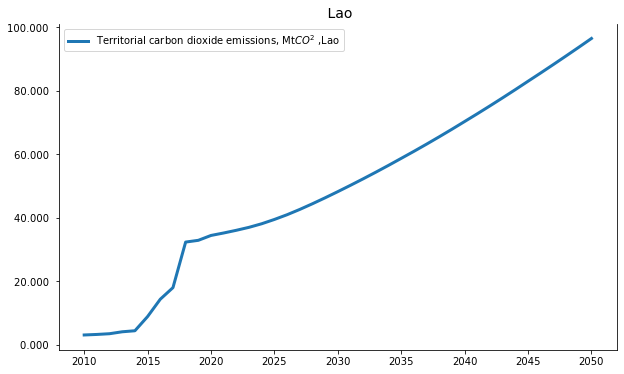

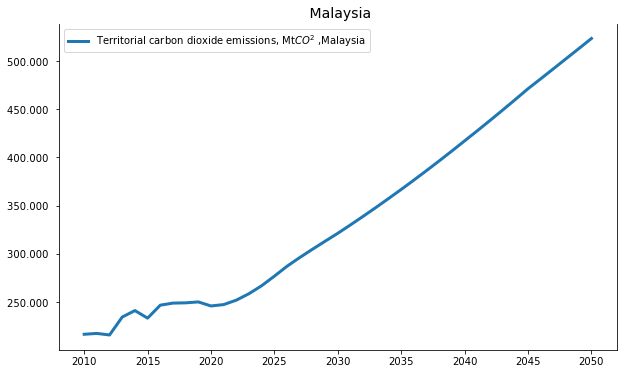

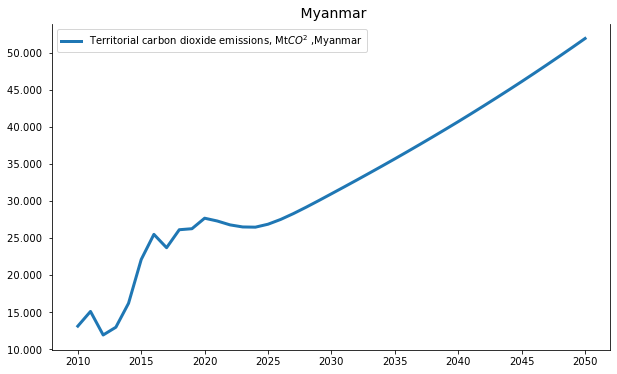

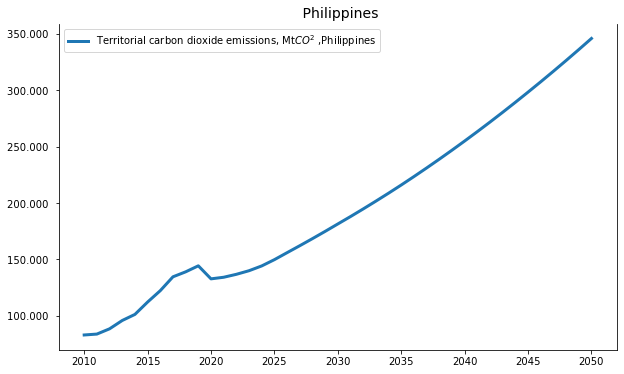

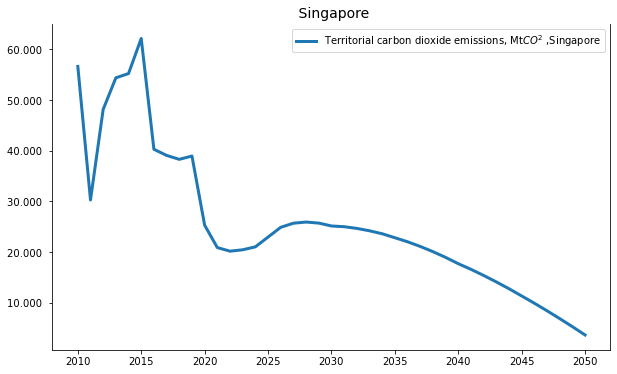

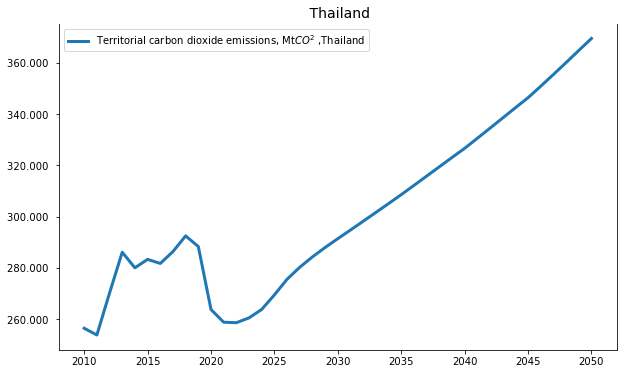

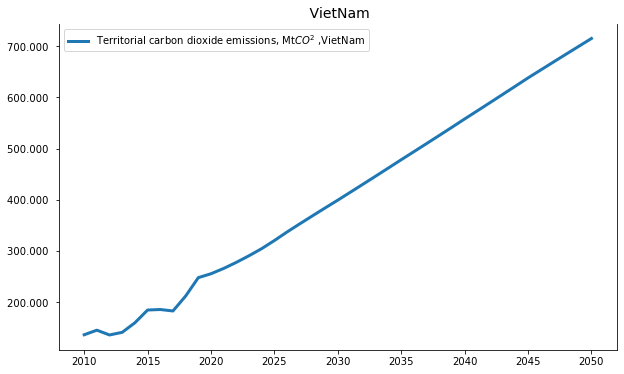

In [7]:
for t in target_var:
    model.plot_basis(masia.get_a_country(t),df = masia.basedf.loc[2010:,[t]].rename(columns=masia.var_description),legend=1);

# Carbon tax in Business as usual scenario

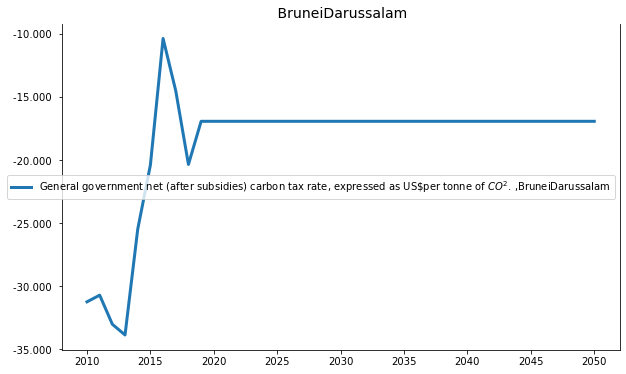

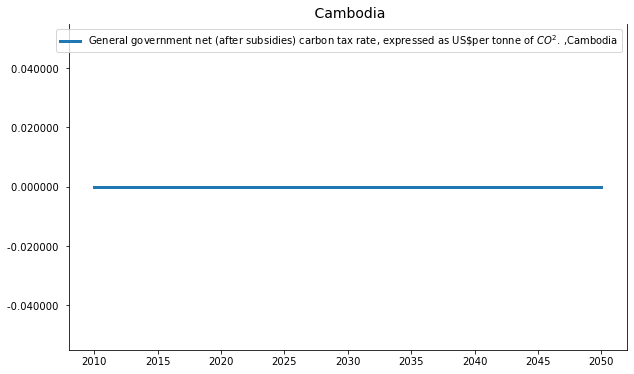

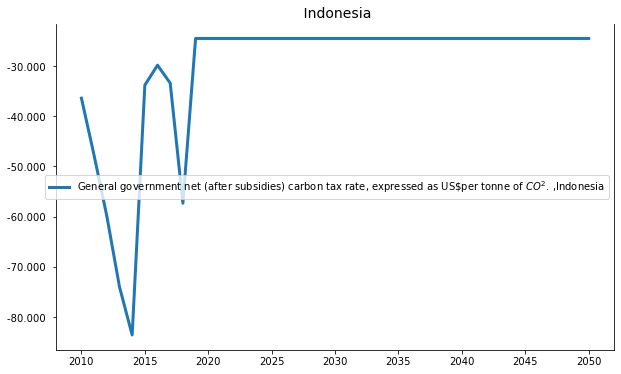

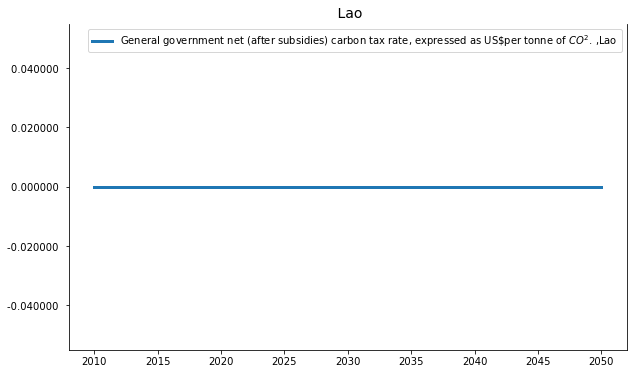

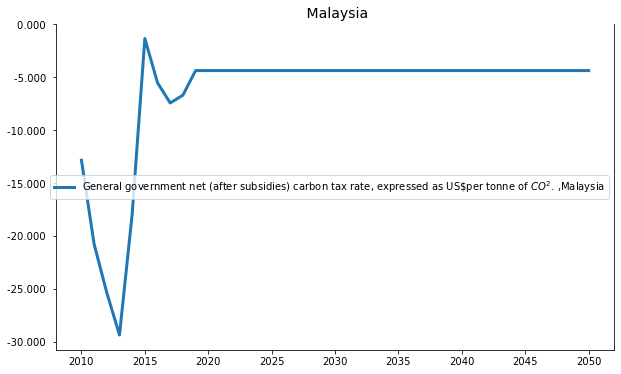

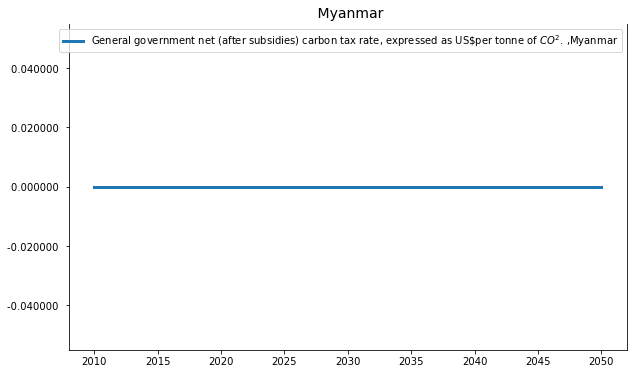

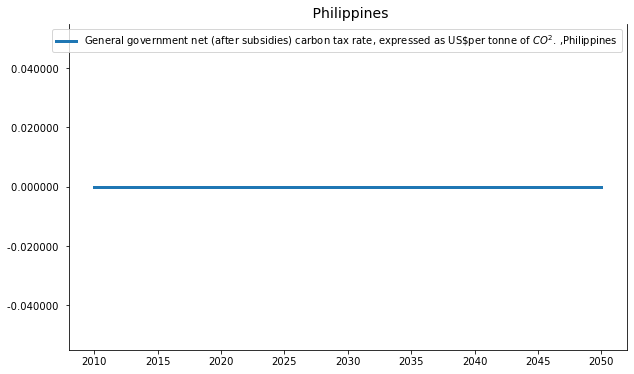

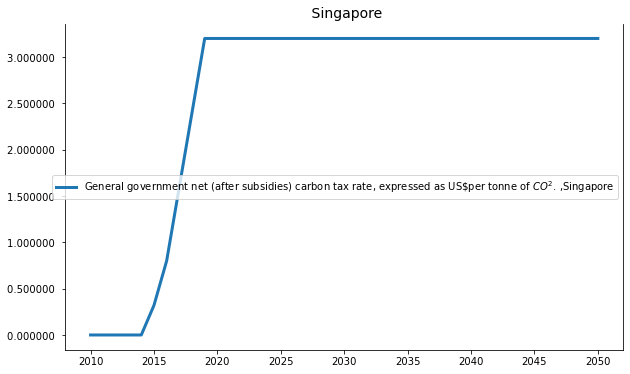

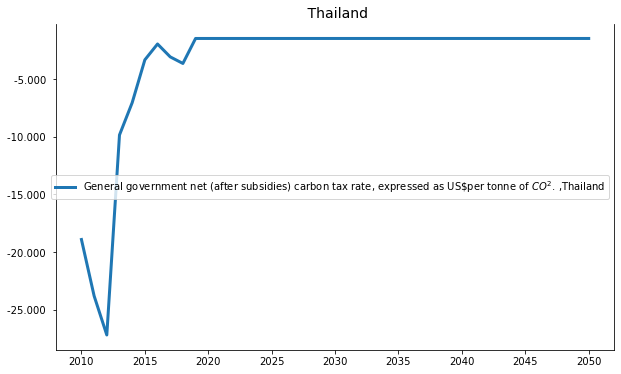

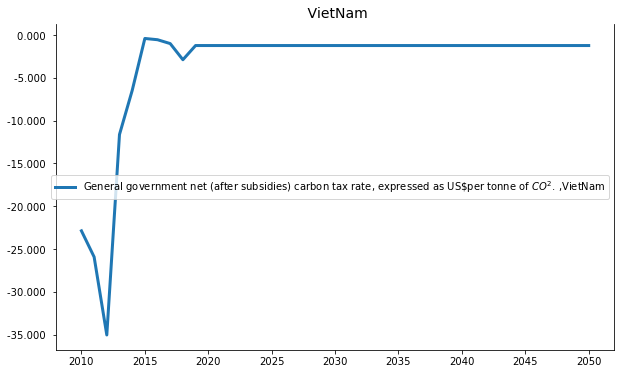

In [8]:
for i in instruments: 
    tax = [i[0][:-2]]
    model.plot_basis(masia.get_a_country(tax[0]),df = masia.basedf.loc[2010:,tax].rename(columns=masia.var_description),legend=1);

# Lets look at the impact of increasing the tax with \$10/tonne  in 2022

In [ ]:
experiment = baseline.copy()
experiment.loc[2022,instrumentlist]= experiment.loc[2022,(instrumentlist := [i[0] for i in instruments])] + 10 
result = masia(experiment,progressbar = 0,silent=1)

In [ ]:
masia[target_var].difpctlevel.mul100.rename().plot(colrow  = 1,title = 'Impact of tax increase of \$10/tonne in percent of "Business as usual"  ',top=0.96,sharey=0,dec=2);
end_pct = masia[target_var].difpctlevel.mul100.df.loc[2050,:]
    

# The impact in 2050 of increasing the tax with 10/tonne in 2022 in percent of BAU

In [ ]:
end_pct.T.rename(masia.get_a_country).sort_values().plot(kind='barh',figsize = (13,8));

# Define a dataframe with with target growth rates in $CO^2$

In [ ]:
bau_2050 = baseline.loc[2050, target_var]
bau_2022  = baseline.loc[2022, target_var]

org_growthrate = (bau_2050/bau_2022)**(1/(2050-2022))
org_growthrate.name = 'Original growth rate'

target_2050 = bau_2050*(1-reduction_percent/100)
target_2050.name= 'target'

target_growthrate = (target_2050/bau_2022)**(1/(2050-2022))
target_growthrate.name = 'Target growth rate'

outdf = pd.DataFrame([bau_2022,bau_2050,target_2050,org_growthrate,target_growthrate])
print(outdf.T)

In [ ]:
target_growth_values = list(target_growthrate.values)
target_growth_values

In [ ]:
target_before = baseline[target_var].loc[2022+delay-1:,:]
calclines = '\n'.join(f'{t} = {t}(-1) * {v}' for t,v in zip(target_var,target_growth_values))
target = target_before.mfcalc(calclines).loc[2022:,:]
print(calclines)

# Show the target developement in emision 

In [ ]:
if 1:
    t = pd.concat([target_before.rename(columns={c: 'BaU '+c for c in target_before.columns}),
                   target.rename(columns={c: 'Target '+c for c in target_before.columns})],axis=1)
    t.plot()

In [ ]:
from modelvis import vis_alt
inject(masia)  

for t in target_var:
    grund  = target_before.loc[2020:,[t]]
    mul    = target.loc[2020:,[t]]
    vis_alt(grund,mul,title=f'Trajectory for $CO^2$ "Business as usual" and {reduction_percent}% reduction: {masia.get_a_country(t)}',top=0.88)
    

# Setup the Target/instrument device

In [ ]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=10,defaultconv=0.5,varimpulse=True,nonlin=4,silent=0)

# Run the device. 
And fetch a cup of coffee. 
Serious calculations are to be performed

In [ ]:
t_i.debug=1
res = t_i(delay=delay,shortfall=0)

# The target is nearly meet. 
The delay causes a slight difference to the target

In [ ]:
with masia.set_smpl(2024,2050):

    masia['LAO_co2 idn_co2'].pct.mul100.rename().plot(
        title=f'Reaching emision target growth rate {target_growth:,.2f}',colrow=1,top=0.8,sharey=0);

# Emission and tax after inverting the model 

In [ ]:
with masia.set_smpl(2010,2050):
    for country in countries_of_interest:
        masia[f'{country}_co2' ].plot_alt(title=f'{masia.iso_dict[country]} ',top=0.88);        
        masia[f'{country}_GCARBR' ].plot_alt(title=f' ',top=0.90);